# Calibrated Optimal Model Analysis

In [1]:
import sys
import pickle
import pandas as pd
import numpy as np
import math
from datetime import datetime
import dateutil
import copy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression

In [2]:
import sys
sys.path.insert(1, '../python/')
from epidemic_model import *
import init_model
import data_mgmt

In [3]:
sns.set(style="ticks")

In [4]:
#__MOD_NAME = "ModNat_v9-test_broad-err1-abs"
__MOD_NAME = "Model-v5_err1abs"
#__MOD_NAME = "Model-v1_err1absfirstrun"
__SAVED_MOD_PATH = "saved_models/"
__PRED_DAYS = 60
__DATE_CURR = '2020-04-19'
__MACRO_GEO = 'ita'

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [5]:
"""
fName = __SAVED_MOD_PATH + __MOD_NAME
with open(fName, 'rb') as f:
    try:
        opt_mod_obj = pickle.load(f)
    except:
        print("error")

import_data = data_mgmt.ImportData("covid_ita_regional.csv")
"""
import_data, opt_mod_obj = init_model.getData(
    geo = __MACRO_GEO, 
    obj_path = __SAVED_MOD_PATH, 
    mod_name = __MOD_NAME,
    rel_path="../")

# High-level comparison by geo

## Parameter sensibility

- Get list of all parameters for all regions in tabular format
- Plot multi-dim scatter plot:
    - (rg, ra, t1, ta2), (rg, ra, alpha, gamma), (beta, beta_gcn, tgi2, tgn2), (Igs, Ias, t1, t2)
    - (rg, ra, t1, err), (rg, ra, ta2, err), (alpha, gamma, beta, err), (Igs, Ias, ta2, err)

In [6]:
mod_type = 'opt'
mod_name = 'tot'

geo_list = opt_mod_obj['model'].values()
geo_codes = opt_mod_obj['model'].keys()
data = {
    'geo_code': [x for x in geo_codes],
    'area': [x['name'][0] for x in geo_list],
    'rg': [x[mod_type][mod_name]['mod'].params['rg'] for x in geo_list],
    'ra': [x[mod_type][mod_name]['mod'].params['ra'] for x in geo_list],
    'alpha': [x[mod_type][mod_name]['mod'].params['alpha'] for x in geo_list],
    'beta': [x[mod_type][mod_name]['mod'].params['beta'] for x in geo_list],
    'beta_gcn': [x[mod_type][mod_name]['mod'].params['beta_gcn'] for x in geo_list],
    'gamma': [x[mod_type][mod_name]['mod'].params['gamma'] for x in geo_list],
    't1': [x[mod_type][mod_name]['mod'].params['t1'] for x in geo_list],
    'tgi2': [x[mod_type][mod_name]['mod'].params['tgi2'] for x in geo_list],
    'tgn2': [x[mod_type][mod_name]['mod'].params['tgn2'] for x in geo_list],
    'ta2': [x[mod_type][mod_name]['mod'].params['ta2'] for x in geo_list],
    'Igs_t': [x[mod_type][mod_name]['mod'].Igs_t[0] for x in geo_list],
    'Ias_t': [x[mod_type][mod_name]['mod'].Ias_t[0] for x in geo_list],
    'err_tot': [x[mod_type][mod_name]['err_tot'] for x in geo_list]
}

df = pd.DataFrame(data)


mod_type = 'opt_window'
geo_list = opt_mod_obj['model'].values()
data_window = {
# This needs to be fixed above
    'geo_code': [x for x in geo_codes],
    'area': [x['name'][0] for x in geo_list],
    'rg': [x[mod_type][mod_name]['mod'].params['rg'] for x in geo_list],
    'ra': [x[mod_type][mod_name]['mod'].params['ra'] for x in geo_list],
    'alpha': [x[mod_type][mod_name]['mod'].params['alpha'] for x in geo_list],
    'beta': [x[mod_type][mod_name]['mod'].params['beta'] for x in geo_list],
    'beta_gcn': [x[mod_type][mod_name]['mod'].params['beta_gcn'] for x in geo_list],
    'gamma': [x[mod_type][mod_name]['mod'].params['gamma'] for x in geo_list],
    't1': [x[mod_type][mod_name]['mod'].params['t1'] for x in geo_list],
    'tgi2': [x[mod_type][mod_name]['mod'].params['tgi2'] for x in geo_list],
    'tgn2': [x[mod_type][mod_name]['mod'].params['tgn2'] for x in geo_list],
    'ta2': [x[mod_type][mod_name]['mod'].params['ta2'] for x in geo_list],
    'Igs_t': [x[mod_type][mod_name]['mod'].Igs_t[0] for x in geo_list],
    'Ias_t': [x[mod_type][mod_name]['mod'].Ias_t[0] for x in geo_list],
    'err_tot': [x[mod_type][mod_name]['err_tot'] for x in geo_list]
}

df_window = pd.DataFrame(data_window)

In [7]:
df.sort_values('area')

,geo_code,area,rg,ra,alpha,beta,beta_gcn,gamma,t1,tgi2,tgn2,ta2,Igs_t,Ias_t,err_tot
5,13,Abruzzo,0.251559,0.253935,0.703494,0.173137,0.003463,0.076611,3,30,32,6,37,1,70.217198
12,17,Basilicata,0.096800,0.297000,0.673200,0.004050,0.004050,0.066330,5,25,31,3,60,0,12.242279
15,18,Calabria,0.072193,0.270587,0.828950,0.005403,0.004987,0.020210,5,26,32,8,0,48,28.881109
8,15,Campania,0.230423,0.521194,0.900244,0.017364,0.004287,0.057444,3,27,31,7,46,0,107.845701
13,6,Friuli Venezia Giulia,0.209000,0.285000,0.714000,0.237500,0.004750,0.063650,3,23,17,7,47,0,111.202264
4,12,Lazio,0.160380,0.399300,0.239580,0.013365,0.004455,0.089177,3,12,28,3,66,54,154.054365
14,7,Liguria,0.242000,0.880000,0.855000,0.004500,0.013500,0.073700,3,12,22,3,45,0,142.389998
6,3,Lombardia,0.241356,0.860278,0.836260,0.016780,0.016780,0.053334,3,13,19,3,66,81,2617.697326
1,11,Marche,0.228690,0.381150,0.187110,0.019058,0.012757,0.051557,3,21,19,3,51,63,391.774622
7,14,Molise,0.242550,0.496375,0.857375,0.013537,0.004513,0.060467,3,21,29,5,1,1,10.247789


In [8]:
df_window.sort_values('area')

,geo_code,area,rg,ra,alpha,beta,beta_gcn,gamma,t1,tgi2,tgn2,ta2,Igs_t,Ias_t,err_tot
5,13,Abruzzo,0.261496,0.335368,0.776348,0.114347,0.002287,0.102181,3,30,32,6,37,1,58.995520
12,17,Basilicata,0.084532,0.288179,0.465544,0.004613,0.003645,0.095703,5,16,32,3,60,0,7.270811
15,18,Calabria,0.074687,0.254487,0.471458,0.010646,0.004612,0.064857,6,9,35,5,0,52,13.051940
8,15,Campania,0.228118,0.567580,0.909246,0.033355,0.003702,0.060304,3,25,31,8,44,0,84.216003
13,6,Friuli Venezia Giulia,0.225302,0.237821,0.784683,0.121436,0.001929,0.077328,4,22,19,5,43,0,54.590014
4,12,Lazio,0.166698,0.439186,0.216090,0.014649,0.003822,0.152640,3,7,35,3,58,57,89.503332
14,7,Liguria,0.239580,0.776239,0.855000,0.003563,0.011907,0.085966,3,11,23,3,45,0,114.756435
6,3,Lombardia,0.260208,1.133580,0.836260,0.009225,0.015624,0.081983,3,10,22,3,61,80,1740.824620
1,11,Marche,0.185947,0.574284,0.168680,0.002792,0.009361,0.066041,3,15,27,3,58,60,107.932234
7,14,Molise,0.216112,0.442270,0.960856,0.031393,0.003322,0.069128,4,17,28,3,0,1,7.862981


In [9]:
stats_param = {
    'rg': [round(df_window['rg'].min(), 4), round(df_window['rg'].mean(), 4), round(df_window['rg'].median(), 4), round(df_window['rg'].max(), 4)],
    'ra': [round(df_window['ra'].min(), 4), round(df_window['ra'].mean(), 4), round(df_window['ra'].median(), 4), round(df_window['ra'].max(), 4)],
    'alpha': [round(df_window['alpha'].min(), 4), round(df_window['alpha'].mean(), 4), round(df_window['alpha'].median(), 4), round(df_window['alpha'].max(), 4)],
    'beta': [round(df_window['beta'].min(), 4), round(df_window['beta'].mean(), 4), round(df_window['beta'].median(), 4), round(df_window['beta'].max(), 4)],
    'beta_gcn': [round(df_window['beta_gcn'].min(), 4), round(df_window['beta_gcn'].mean(), 4), round(df_window['beta_gcn'].median(), 4), round(df_window['beta_gcn'].max(), 4)],
    'gamma': [round(df_window['gamma'].min(), 4), round(df_window['gamma'].mean(), 4), round(df_window['gamma'].median(), 4), round(df_window['gamma'].max(), 4)],
    't1': [round(df_window['t1'].min(), 4), round(df_window['t1'].mean(), 4), round(df_window['t1'].median(), 4), round(df_window['t1'].max(), 4)],
    'tgi2': [round(df_window['tgi2'].min(), 4), round(df_window['tgi2'].mean(), 4), round(df_window['tgi2'].median(), 4), round(df_window['tgi2'].max(), 4)],
    'tgn2': [round(df_window['tgn2'].min(), 4), round(df_window['tgn2'].mean(), 4), round(df_window['tgn2'].median(), 4), round(df_window['tgn2'].max(), 4)],
    'ta2': [round(df_window['ta2'].min(), 4), round(df_window['ta2'].mean(), 4), round(df_window['ta2'].median(), 4), round(df_window['ta2'].max(), 4)],
    'Igs_t': [round(df_window['Igs_t'].min(), 4), round(df_window['Igs_t'].mean(), 4), round(df_window['Igs_t'].median(), 4), round(df_window['Igs_t'].max(), 4)],
    'Ias_t': [round(df_window['Ias_t'].min(), 4), round(df_window['Ias_t'].mean(), 4), round(df_window['Ias_t'].median(), 4), round(df_window['Ias_t'].max(), 4)]
}

for param in stats_param.keys():
    print(param + ": \t" + str(stats_param[param]))

rg: 	[0.0747, 0.2042, 0.2202, 0.3807]
ra: 	[0.2378, 0.5054, 0.4407, 1.1336]
alpha: 	[0.1687, 0.6436, 0.7349, 0.9609]
beta: 	[0.0022, 0.0354, 0.0126, 0.1214]
beta_gcn: 	[0.0019, 0.0063, 0.0043, 0.0156]
gamma: 	[0.0308, 0.0742, 0.0708, 0.1526]
t1: 	[3, 3.5, 3.0, 6]
tgi2: 	[7, 18.75, 17.0, 32]
tgn2: 	[19, 27.1875, 27.5, 35]
ta2: 	[3, 4.5, 5.0, 8]
Igs_t: 	[0, 42.125, 45.5, 119]
Ias_t: 	[0, 32.375, 22.5, 124]


# Optimal Model Focus

## Model choice

In [10]:
geo_code = 'aggr'
if(geo_code == 'aggr'):
    data_uff = data_mgmt.ActualData(import_data.data_aggr)
else:
    data_uff = data_mgmt.ActualData(
        import_data.data[import_data.data['geo_code'] == geo_code].reset_index()
    )

opt_model = opt_mod_obj['model'][geo_code]['opt']
opt_model_window = opt_mod_obj['model'][geo_code]['opt_window']

print("Geo: ", opt_mod_obj['model'][geo_code]['name'])

Geo:  National


In [11]:
(opt_model['tot']['period'], opt_model['tot']['i_start'])

(56, 10)

In [12]:
opt_model['tot']['mod'].run(400)
opt_model_window['tot']['mod'].run(400)
opt_model['tot']['mod_data'] = mod_dat(opt_model['tot']['mod'])
opt_model_window['tot']['mod_data'] = mod_dat(opt_model_window['tot']['mod'])



initial length rg_period:  201
201 601
final length rg_period:  601
initial length rg_period:  201
final length ra_period:  601


In [13]:
model_name = 'tot'
params_opt = opt_model[model_name]['mod'].params
params_opt_window = opt_model_window[model_name]['mod'].params
for param_name in params_opt.keys():
    if param_name not in ['rg_period', 'ra_period']:
        print("%10s: %7.4f  %7.4f" %(param_name, params_opt[param_name], params_opt_window[param_name]))

        rg:  0.1300   0.1604
        ra:  0.5000   0.6788
     alpha:  0.6058   0.6300
      beta:  0.0100   0.0105
  beta_gcn:  0.0200   0.0108
     gamma:  0.0500   0.0475
        t1:  6.0000   3.0000
      tgi2: 15.0000  17.0000
      tgn2: 15.0000  22.0000
       ta2:  4.0000   5.0000
    Igs_t0: 100.0000  119.0000
   Igci_t0:  0.0000   0.0000
   Igcn_t0:  0.0000   0.0000
    Ias_t0: 100.0000  124.0000
      M_t0:  0.0000   0.0000
   Ggci_t0:  0.0000   0.0000
   Ggcn_t0:  0.0000   0.0000
    Gas_t0:  0.0000   0.0000
   Pop_tot: 60359546.0000  60359546.0000


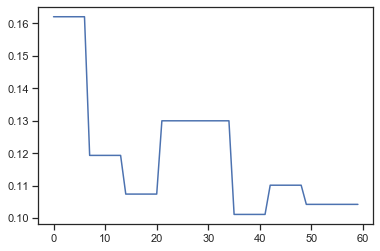

In [14]:
geo = geo_code
mod_type = 'opt_window'
plt.plot(opt_mod_obj['model'][geo][mod_type][mod_name]['mod'].params['rg_period'][0:60])
#print(opt_mod_obj['model'][geo][mod_type][mod_name]['mod'].params['rg_period'])

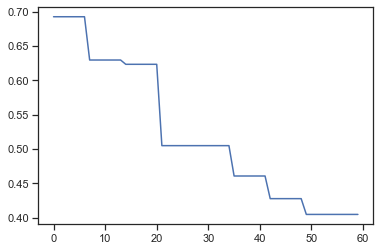

In [15]:
plt.plot(opt_mod_obj['model'][geo][mod_type][mod_name]['mod'].params['ra_period'][0:60])

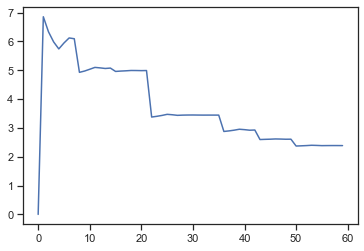

In [16]:
plt.plot(opt_mod_obj['model'][geo][mod_type][mod_name]['mod'].R0_t[0:60])

# Model Statistics & Predictions

In [17]:
date_curr = __DATE_CURR
#date_curr = '2020-03-26'
#model_name = 'tot'
stats = ModelStats(opt_model[model_name], data_uff)
print("Date: " + __DATE_CURR)
stats.printKpis(date_curr)

Date: 2020-04-19
                  Tot Infected: 178.97K vs 261.17K (3.05K vs 21.22K), errore: -82.20K
            Currently Infected: 108.26K vs 166.19K (486.00 vs 13.11K), errore: -57.93K
        Currently in Int. Care:   2.63K vs   8.86K (-98.00 vs 699.64), errore: -6.22K
                 Tot Recovered:  47.05K vs  59.05K (2.13K vs 5.14K), errore: -11.99K
                      Tot Dead:  23.66K vs  35.94K (433.00 vs 2.98K), errore: -12.28K

          % Increase, Infected:    1.73 vs    8.85 (-0.29 vs -0.03), errore: -7.11
              % Mortality Rate:    1.97 vs    3.35 (-0.08 vs  0.01), errore: -1.38
         % Known Recovery Rate:    0.40 vs    1.95 (-0.05 vs -0.00), errore: -1.54

             % Recovered / Tot:   26.29 vs   22.61 ( 0.75 vs  0.14), errore: 3.68
                  % Dead / Tot:   13.22 vs   13.76 ( 0.02 vs  0.02), errore: -0.54
              % Intensive Care:    2.43 vs    5.33 (-0.10 vs  0.00), errore: -2.90
          % Non Intensive Care:   97.57 vs   94.67 ( 0

In [18]:
stats_window = ModelStats(opt_model_window[model_name], data_uff)
stats_window.printKpis(date_curr)

                  Tot Infected: 178.97K vs 193.58K (3.05K vs 4.74K), errore: -14.60K
            Currently Infected: 108.26K vs 103.49K (486.00 vs -566.61), errore: 4.77K
        Currently in Int. Care:   2.63K vs   3.88K (-98.00 vs -48.73), errore: -1.25K
                 Tot Recovered:  47.05K vs  61.85K (2.13K vs 4.19K), errore: -14.79K
                      Tot Dead:  23.66K vs  28.24K (433.00 vs 1.12K), errore: -4.58K

          % Increase, Infected:    1.73 vs    2.51 (-0.29 vs -0.11), errore: -0.78
              % Mortality Rate:    1.97 vs    4.03 (-0.08 vs -0.21), errore: -2.05
         % Known Recovery Rate:    0.40 vs    1.08 (-0.05 vs  0.00), errore: -0.67

             % Recovered / Tot:   26.29 vs   31.95 ( 0.75 vs  1.42), errore: -5.66
                  % Dead / Tot:   13.22 vs   14.59 ( 0.02 vs  0.23), errore: -1.37
              % Intensive Care:    2.43 vs    3.75 (-0.10 vs -0.03), errore: -1.32
          % Non Intensive Care:   97.57 vs   96.25 ( 0.10 vs  0.03), erro

In [19]:
date_Igc_cum = stats.data['mod_Igc_cum'].idxmax()
date_Igc = stats.data['mod_Igc'].idxmax()
peak = {
    'Igc_cum': (stats.data['mod_Igc_cum'].idxmax(), format_number(stats.data['mod_Igc_cum'].max())),
    'Igc': (stats.data['mod_Igc'].idxmax(), format_number(stats.data['mod_Igc'].max())),
    'Igci': (stats.data['mod_Igci_t'].idxmax(), format_number(stats.data['mod_Igci_t'].max())),
    'M': (stats.data['mod_M'].idxmax(), format_number(stats.data['mod_M'].max())),
    'M_cum': (stats.data['mod_M_cum'].idxmax(), format_number(stats.data['mod_M_cum'].max())),
    #'Popi': (format_number(stats.data.loc[date_Igc_cum, 'mod_Popi_t']), format_number(stats.data.loc[date_Igc, 'mod_Popi_t']))
}
peak_window = {
    'Igc_cum': (stats_window.data['mod_Igc_cum'].idxmax(), format_number(stats_window.data['mod_Igc_cum'].max())),
    'Igc': (stats_window.data['mod_Igc'].idxmax(), format_number(stats_window.data['mod_Igc'].max())),
    'Igci': (stats_window.data['mod_Igci_t'].idxmax(), format_number(stats_window.data['mod_Igci_t'].max())),
    'M': (stats_window.data['mod_M'].idxmax(), format_number(stats_window.data['mod_M'].max())),
    'M_cum': (stats_window.data['mod_M_cum'].idxmax(), format_number(stats_window.data['mod_M_cum'].max())),
    #'Popi': (format_number(stats_window.data.loc[date_Igc_cum, 'mod_Popi_t']), format_number(stats_window.data.loc[date_Igc, 'mod_Popi_t']))
}

In [20]:
peak

{'Igc_cum': (Timestamp('2021-10-06 00:00:00'), '14.94M'),
 'Igc': (Timestamp('2020-06-11 00:00:00'), '3.60M'),
 'Igci': (Timestamp('2020-06-11 00:00:00'), '199.07K'),
 'M': (Timestamp('2020-06-12 00:00:00'), '70.06K'),
 'M_cum': (Timestamp('2021-10-06 00:00:00'), '2.96M')}

In [21]:
peak_window

{'Igc_cum': (Timestamp('2021-10-10 00:00:00'), '690.70K'),
 'Igc': (Timestamp('2020-04-15 00:00:00'), '105.24K'),
 'Igci': (Timestamp('2020-04-12 00:00:00'), '4.07K'),
 'M': (Timestamp('2020-04-16 00:00:00'), '1.13K'),
 'M_cum': (Timestamp('2021-10-10 00:00:00'), '127.28K')}

# Model Performance

## Optimal Model

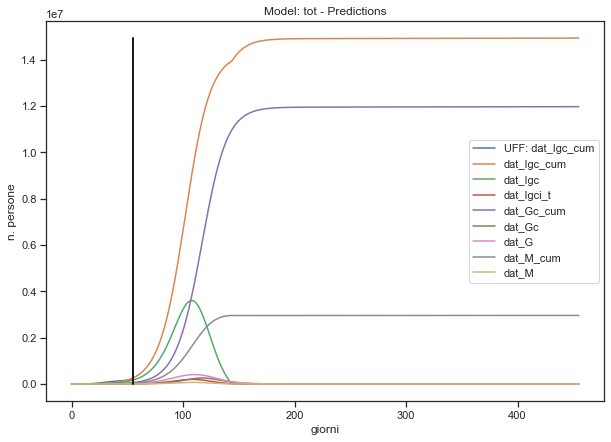

In [30]:
#Models dynamics
pred_days = __PRED_DAYS
pred_days = 400
graphOptAll('tot', opt_model, data_uff, var_name_uff = 'dat_Igc_cum', pred_days=pred_days)


In [23]:
def graphAllCompAct(var_name, opt_mod, data_uff):
    #var_name = 'dat_Igc_cum'
    #opt_mod = mod_optimizer.opt_model


    plt.figure(figsize = (10,7))
    #data_uff_istart = data_uff.i_start


    plt.plot(getattr(data_uff, var_name)[data_uff.i_start:], label = "UFF")
    plotOptModLine(var_name, opt_mod, 'tot', 'tot')
    #plotOptModLine(var_name, opt_mod, 'Igc_cum', 'Igc_cum')
    #plotOptModLine(var_name, opt_mod, 'Igc', 'Igc')
    #plotOptModLine(var_name, opt_mod, 'Gc_cum', 'Gc_cum')
    #plotOptModLine(var_name, opt_mod, 'M_cum', 'M_cum')
    #plt.ylim((0,20000))
    plt.xlabel('giorni')
    plt.ylabel('n. persone')
    plt.title('Actual vs Model: ' + var_dic[var_name])
    plt.legend()
    plt.show()

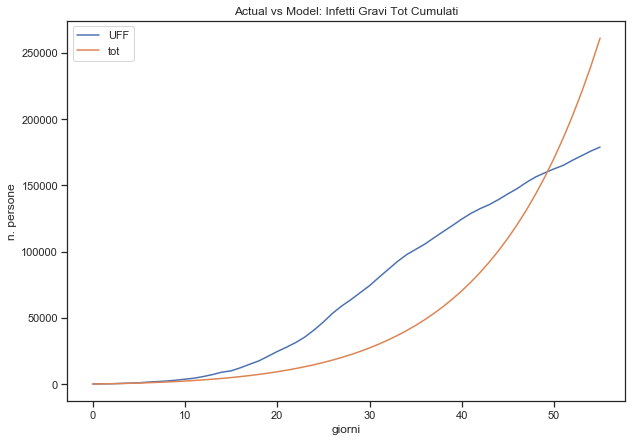

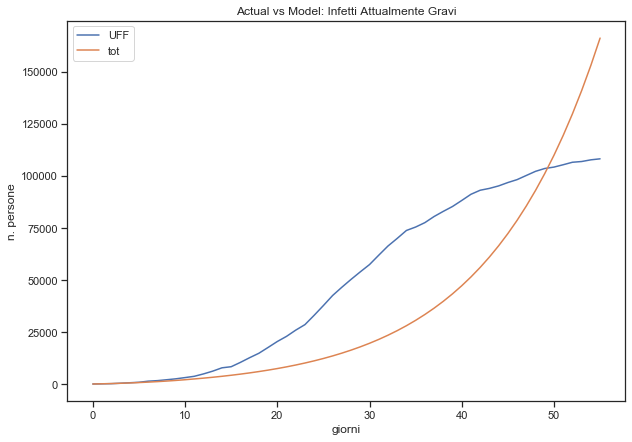

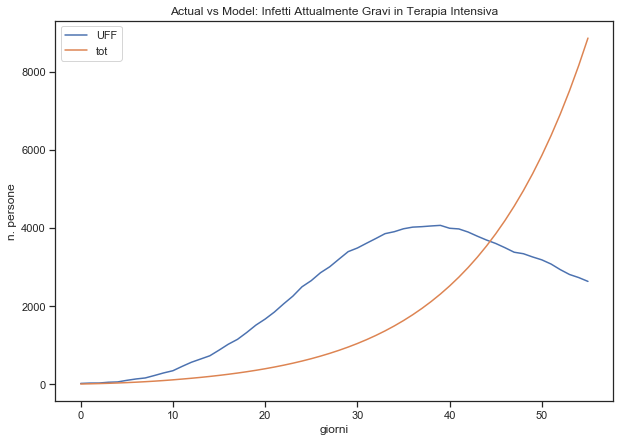

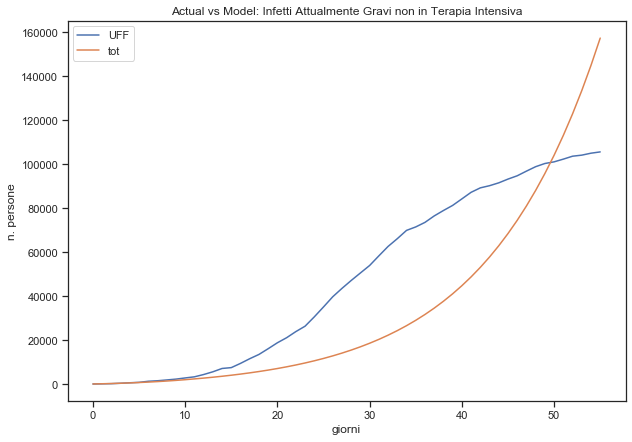

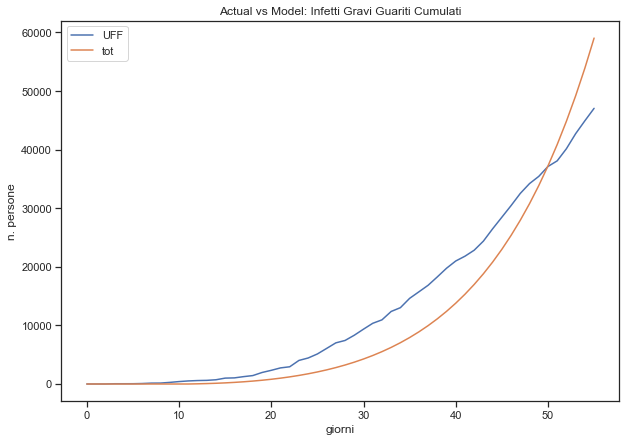

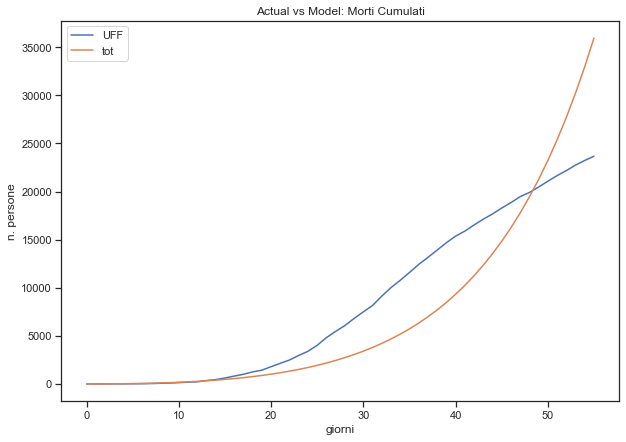

In [24]:
# One variable per comparison, actual vs all models
graphAllCompAct('dat_Igc_cum', opt_model, data_uff)
graphAllCompAct('dat_Igc', opt_model, data_uff)
graphAllCompAct('dat_Igci_t', opt_model, data_uff)
graphAllCompAct('dat_Igcn_t', opt_model, data_uff)
graphAllCompAct('dat_Gc_cum', opt_model, data_uff)
graphAllCompAct('dat_M_cum', opt_model, data_uff)

## Optimized Window Model

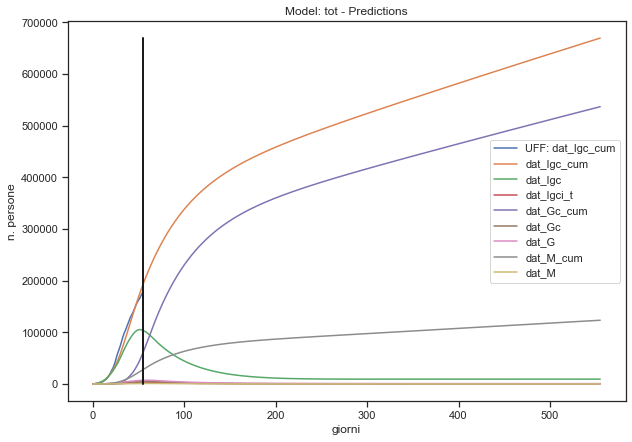

In [33]:
#Models dynamics
#pred_days = 100
pred_days = __PRED_DAYS
pred_days = 500
graphOptAll('tot', opt_model_window, data_uff, var_name_uff = 'dat_Igc_cum', pred_days=pred_days)


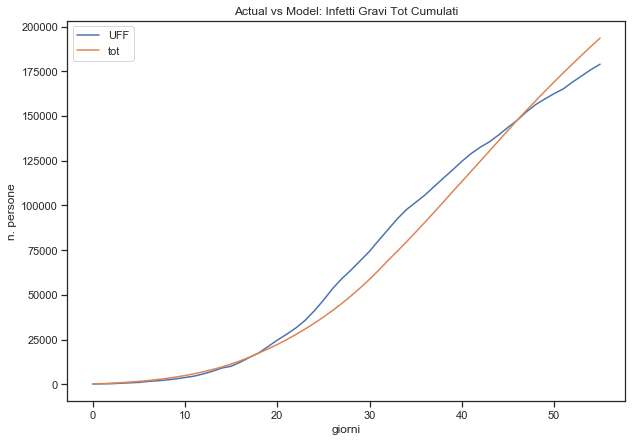

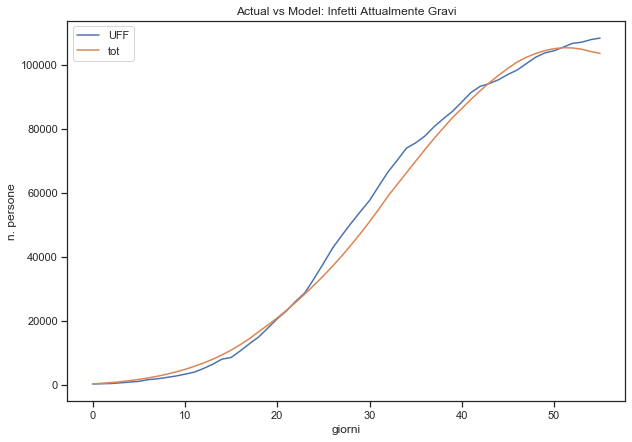

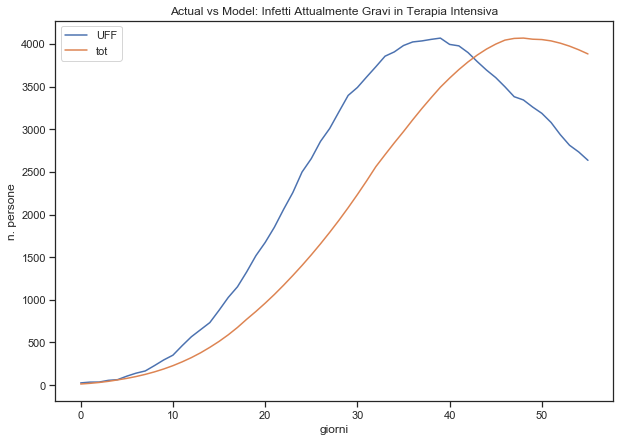

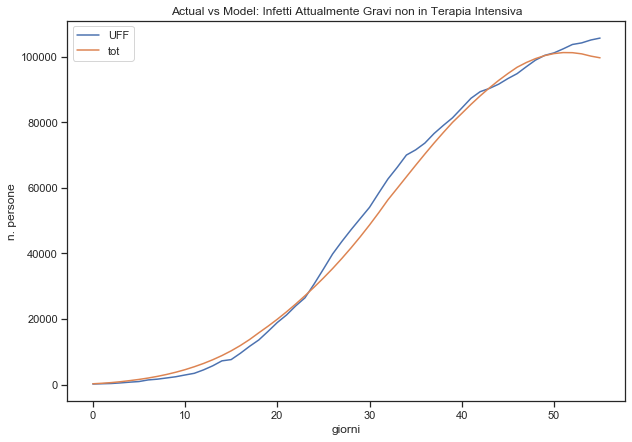

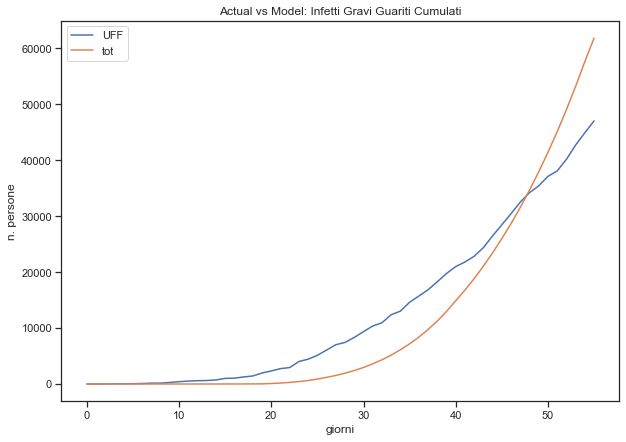

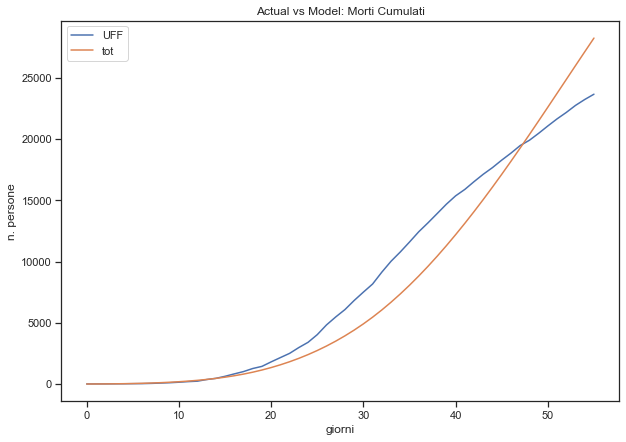

In [26]:
# One variable per comparison, actual vs all models

graphAllCompAct('dat_Igc_cum', opt_model_window, data_uff)
graphAllCompAct('dat_Igc', opt_model_window, data_uff)
graphAllCompAct('dat_Igci_t', opt_model_window, data_uff)
graphAllCompAct('dat_Igcn_t', opt_model_window, data_uff)
graphAllCompAct('dat_Gc_cum', opt_model_window, data_uff)
graphAllCompAct('dat_M_cum', opt_model_window, data_uff)

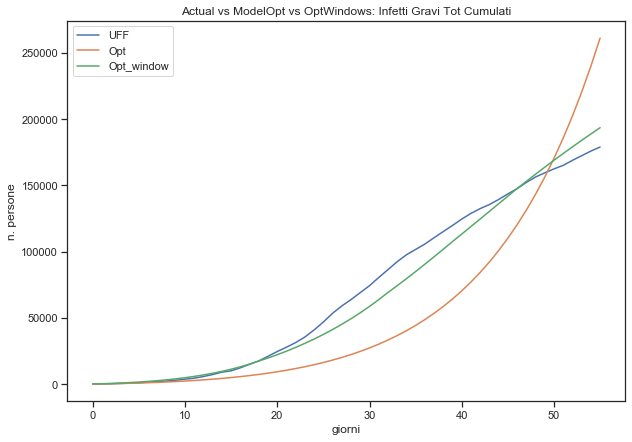

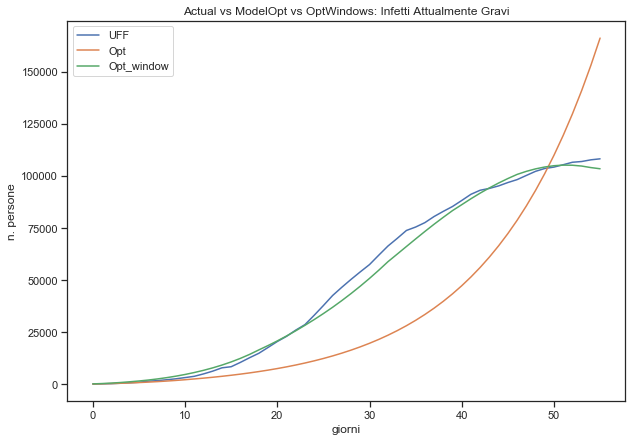

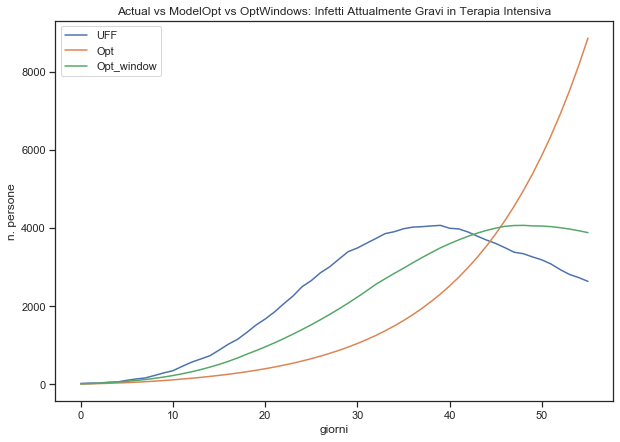

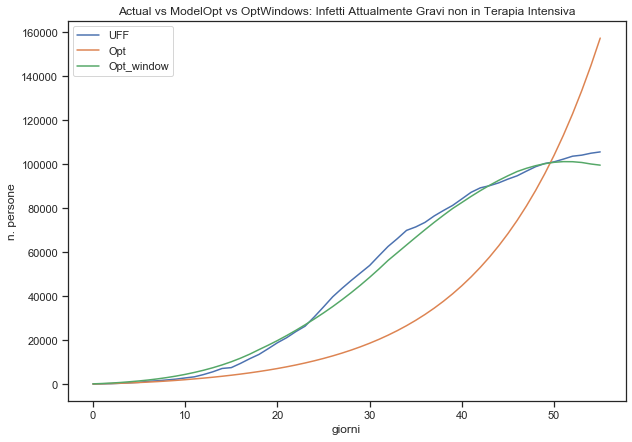

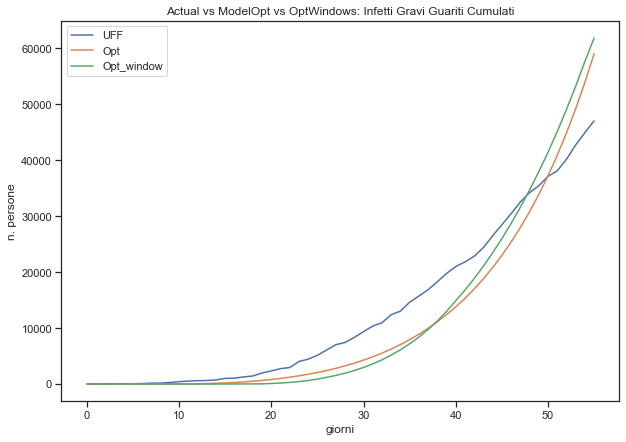

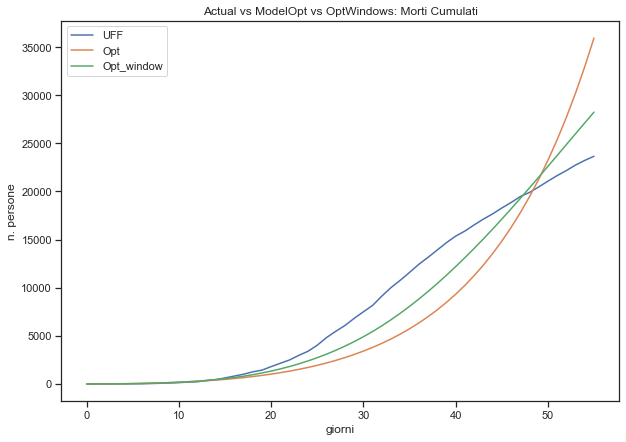

In [27]:
mod_name = 'tot'
graphWindowComp("dat_Igc_cum", data_uff, opt_model, opt_model_window, mod_name)
graphWindowComp("dat_Igc", data_uff, opt_model, opt_model_window, mod_name)
graphWindowComp("dat_Igci_t", data_uff, opt_model, opt_model_window, mod_name)
graphWindowComp("dat_Igcn_t", data_uff, opt_model, opt_model_window, mod_name)
graphWindowComp("dat_Gc_cum", data_uff, opt_model, opt_model_window, mod_name)
graphWindowComp("dat_M_cum", data_uff, opt_model, opt_model_window, mod_name)

In [28]:

stats_window.data[['uff_Igc_cum', 'mod_Igc_cum', 'uff_Igc', 'mod_Igc', 'uff_Gc_cum', 'mod_Gc_cum', 'uff_M_cum', 'mod_M_cum']]

,uff_Igc_cum,mod_Igc_cum,uff_Igc,mod_Igc,uff_Gc_cum,mod_Gc_cum,uff_M_cum,mod_M_cum
date,,,,,,,,
2020-02-18,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
2020-02-19,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
2020-02-20,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
2020-02-21,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
2020-02-22,NaN,66.254150,NaN,66.254150,NaN,0.000000,NaN,0.000000
...,...,...,...,...,...,...,...,...
2021-10-06,NaN,688502.530377,NaN,9331.555691,NaN,552297.211367,NaN,126873.763319
2021-10-07,NaN,689052.437583,NaN,9330.044349,NaN,552748.240512,NaN,126974.152722
2021-10-08,NaN,689602.227888,NaN,9328.529235,NaN,553199.172789,NaN,127074.525864


### Model Statistics Classes

Basics Stats
1. Valore picco e corrispondente data per serie storica
2. totale morti, totale guariti, totale infettati
3. Model Graph (tutte le curve del modello)
NB: pensa a mettere i calcoli nel modello. Questa classe la usi più per mostrare le statistiche
- creare una serie storica di una data variabile, al variare di un valore di parametro --> fare grafico


Finire Windows e trovare per ogni modello la lista di rg e ra ottimale.


Appena finito qui:
- prendere dati per regioni, e addestrare un modello per regione
- fare modello nazionale come somma dei modelli regionali, comparare con efficacia modello nazionale

Inoltre, fare procedura che scarica dati da github, e poi lancia il notebook

In [29]:
#backup

grid_param.setGrid(Param('rg', par_min = 0.000001), grid_avg = 0.25, grid_min = 0.15, grid_max = 0.35, steps = 2)
grid_param.setGrid(Param('ra', par_min = 0.000001), grid_avg = 0.4, grid_min = 0.3, grid_max = 0.5, steps = 2)
grid_param.setGrid(Param('alpha', par_min = 0.00000001), grid_avg = 0.85, grid_min = 0.75, grid_max = 0.95, steps = 2)
grid_param.setGrid(Param('beta', par_min = 0.00000001), grid_avg = 0.05, grid_min = 0.01, grid_max = 0.1, steps = 2)
grid_param.setGrid(Param('beta_gcn', par_min = 0.00000001), grid_avg = 0.05, grid_min = 0.01, grid_max = 0.1, steps = 1)
grid_param.setGrid(Param('gamma', par_min = 0.00000001), grid_avg = 0.05, grid_min = 0.01, grid_max = 0.15, steps = 2)
grid_param.setGrid(Param('t1', par_min = 1), grid_avg = 4, grid_min = 2, grid_max = 6, steps = 2)
grid_param.setGrid(Param('tgi2', par_min = 1), grid_avg = 12, grid_min = 7, grid_max = 25, steps = 2)
grid_param.setGrid(Param('tgn2', par_min = 1), grid_avg = 12, grid_min = 7, grid_max = 25, steps = 2)
grid_param.setGrid(Param('ta2', par_min = 1), grid_avg = 6, grid_min = 4, grid_max = 12, steps = 2)
grid_param.setGrid(Param('Igs_t0', par_min = 0), grid_avg = 5, grid_min = 20, grid_max = 300, steps = 1)
grid_param.setGrid(Param('Igci_t0', par_min = 0), grid_avg = 0, grid_min = 0, grid_max = 200, steps = 1)
grid_param.setGrid(Param('Igcn_t0', par_min = 0), grid_avg = 0, grid_min = 0, grid_max = 200, steps = 1)
grid_param.setGrid(Param('Ias_t0', par_min = 0), grid_avg = 5, grid_min = 1, grid_max = 20, steps = 1)
grid_param.setGrid(Param('M_t0', par_min = 0), grid_avg = 0, grid_min = 70, grid_max = 200, steps = 1)
grid_param.setGrid(Param('Ggci_t0', par_min = 0), grid_avg = 0, grid_min = 0, grid_max = 200, steps = 1)
grid_param.setGrid(Param('Ggcn_t0', par_min = 0), grid_avg = 0, grid_min = 0, grid_max = 200, steps = 1)
grid_param.setGrid(Param('Gas_t0', par_min = 0), grid_avg = 0, grid_min = 100, grid_max = 500, steps = 1)


grid_param.setGrid(Param('rg', par_min = 0.000001), grid_avg = 0.0121253, grid_min = 0.05, grid_max = 0.25, steps = 2)
grid_param.setGrid(Param('ra', par_min = 0.000001), grid_avg = 0.4332332, grid_min = 0.3, grid_max = 0.6, steps = 2)
grid_param.setGrid(Param('alpha', par_min = 0.00000001), grid_avg = 0.55079215, grid_min = 0.35, grid_max = 0.75, steps = 2)
grid_param.setGrid(Param('beta', par_min = 0.00000001), grid_avg = 0.009436764, grid_min = 0.005, grid_max = 0.1, steps = 2)
grid_param.setGrid(Param('beta_gcn', par_min = 0.00000001), grid_avg = 0.013401648500625002, grid_min = 0.005, grid_max = 0.1, steps = 2)
grid_param.setGrid(Param('gamma', par_min = 0.00000001), grid_avg = 0.061851283003125, grid_min = 0.01, grid_max = 0.15, steps = 2)
grid_param.setGrid(Param('t1', par_min = 1), grid_avg = 3, grid_min = 1, grid_max = 6, steps = 2)
grid_param.setGrid(Param('tgi2', par_min = 1), grid_avg =5, grid_min = 3, grid_max = 15, steps = 2)
grid_param.setGrid(Param('tgn2', par_min = 1), grid_avg = 12, grid_min = 7, grid_max = 25, steps = 2)
grid_param.setGrid(Param('ta2', par_min = 1), grid_avg = 15, grid_min = 7, grid_max = 25, steps = 2)
grid_param.setGrid(Param('Igs_t0', par_min = 0), grid_avg = 5, grid_min = 1, grid_max = 10, steps = 1)
grid_param.setGrid(Param('Igci_t0', par_min = 0), grid_avg = 0, grid_min = 0, grid_max = 200, steps = 1)
grid_param.setGrid(Param('Igcn_t0', par_min = 0), grid_avg = 0, grid_min = 0, grid_max = 200, steps = 1)
grid_param.setGrid(Param('Ias_t0', par_min = 0), grid_avg = 5, grid_min = 1, grid_max = 10, steps = 1)
grid_param.setGrid(Param('M_t0', par_min = 0), grid_avg = 0, grid_min = 0, grid_max = 200, steps = 1)
grid_param.setGrid(Param('Ggci_t0', par_min = 0), grid_avg = 0, grid_min = 0, grid_max = 200, steps = 1)
grid_param.setGrid(Param('Ggcn_t0', par_min = 0), grid_avg = 0, grid_min = 0, grid_max = 200, steps = 1)
grid_param.setGrid(Param('Gas_t0', par_min = 0), grid_avg = 0, grid_min = 100, grid_max = 500, steps = 1)


grid_param.setGrid(Param('rg', par_min = 0.000001), grid_avg = 0.55, grid_min = 0.01, grid_max = 1, steps = 4)
grid_param.setGrid(Param('ra', par_min = 0.000001), grid_avg = 0.55, grid_min = 0.01, grid_max = 1, steps = 4)
grid_param.setGrid(Param('alpha', par_min = 0.00000001), grid_avg = 0.55, grid_min = 0.05, grid_max = 0.95, steps = 4)
grid_param.setGrid(Param('beta', par_min = 0.00000001), grid_avg = 0.55, grid_min = 0.01, grid_max = 0.95, steps = 4)
grid_param.setGrid(Param('beta_gcn', par_min = 0.00000001), grid_avg = 0.55, grid_min = 0.01, grid_max = 0.95, steps = 4)
grid_param.setGrid(Param('gamma', par_min = 0.00000001), grid_avg = 0.55, grid_min = 0.05, grid_max = 0.95, steps = 4)
grid_param.setGrid(Param('t1', par_min = 1), grid_avg = 10, grid_min = 2, grid_max = 30, steps = 4)
grid_param.setGrid(Param('tgi2', par_min = 1), grid_avg = 15, grid_min = 2, grid_max = 35, steps = 4)
grid_param.setGrid(Param('tgn2', par_min = 1), grid_avg = 15, grid_min = 2, grid_max = 35, steps = 4)
grid_param.setGrid(Param('ta2', par_min = 1), grid_avg = 15, grid_min = 2, grid_max = 35, steps = 4)
grid_param.setGrid(Param('Igs_t0', par_min = 0), grid_avg = 100, grid_min = 5, grid_max = 20, steps = 2)
grid_param.setGrid(Param('Igci_t0', par_min = 0), grid_avg = 0, grid_min = 0, grid_max = 200, steps = 1)
grid_param.setGrid(Param('Igcn_t0', par_min = 0), grid_avg = 0, grid_min = 0, grid_max = 200, steps = 1)
grid_param.setGrid(Param('Ias_t0', par_min = 0), grid_avg = 200, grid_min = 5, grid_max = 20, steps = 2)
grid_param.setGrid(Param('M_t0', par_min = 0), grid_avg = 0, grid_min = 0, grid_max = 200, steps = 1)
grid_param.setGrid(Param('Ggci_t0', par_min = 0), grid_avg = 0, grid_min = 0, grid_max = 200, steps = 1)
grid_param.setGrid(Param('Ggcn_t0', par_min = 0), grid_avg = 0, grid_min = 0, grid_max = 200, steps = 1)
grid_param.setGrid(Param('Gas_t0', par_min = 0), grid_avg = 0, grid_min = 0, grid_max = 300, steps = 1)



NameError: name 'grid_param' is not defined